In [1]:
#from time import time                                      # various time-related functions
#import os                                                  # portable way of using operating system dependent functionality
import numpy as np                                         # contains multidimensional array and matrix data structures
import matplotlib.pyplot as plt                            # data visualization library for plots, graphs and charts
#%matplotlib inline
#from six.moves import urllib                               # imports a mixture of urllib, urllib2 and urlparse with Python2
import cv2 as cv

In [2]:
# this library is for downloading the overlay to the board
from pynq_dpu import DpuOverlay
# this line will be used later when we want to use the RGB LED Stick
from pynq_peripherals import PmodGroveAdapter
# downloading the overlay to the board
overlay = DpuOverlay("dpu.bit")

In [3]:
overlay.load_model("textmountain_pt.xmodel")

In [4]:
# creates a runner instance that has a number of member functions to control 
# the execution and get the input and output tensors
dpu = overlay.runner

# get the input and output tensors
inputTensors = dpu.get_input_tensors()
outputTensors = dpu.get_output_tensors()

# define the required input and output shapes of the data being put into and received from the model
shapeIn = tuple(inputTensors[0].dims)
shapeOut = tuple(outputTensors[0].dims)
outputSize = int(outputTensors[0].get_data_size() / shapeIn[0])

# create a new array of given shape and type, without initializing entries
softmax = np.empty(outputSize)

In [5]:
print("Shape in: " + str(shapeIn))
print("Shape out: " + str(shapeOut))
print("Output Size: " + str(outputSize))

Shape in: (1, 960, 960, 3)
Shape out: (1, 240, 240, 5)
Output Size: 288000


(1200, 1600, 3)


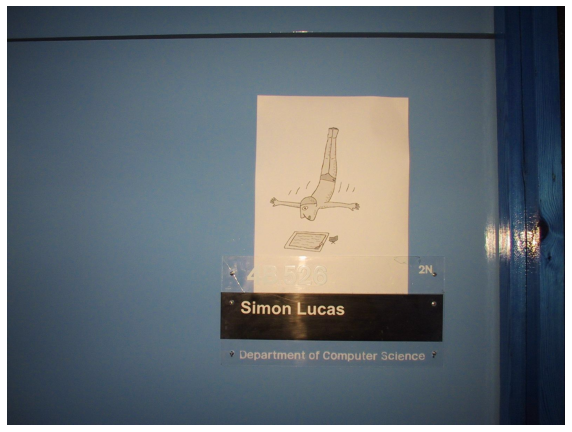

In [6]:
img = cv.imread('sample_photos/SimonLucas.jpg')
plt.figure(figsize=(10, 10)), plt.axis("off"), plt.imshow(img);
print(img.shape)

In [7]:

def plot_images(original_image, processed_image):
    plt.figure(figsize=(15, 15))
    plt.subplot(121),plt.imshow(original_image),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(processed_image),plt.title('Processed')
    plt.xticks([]), plt.yticks([])
    plt.show()

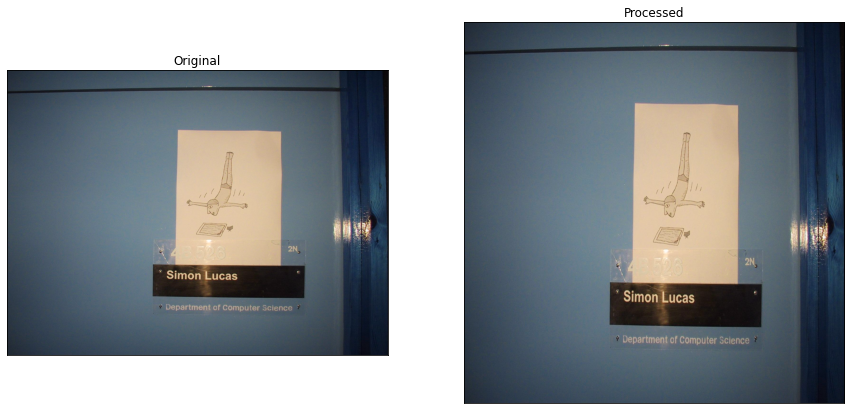

Size of original image:  (1200, 1600, 3)
Size of cropped image:  (960, 960, 3)


In [8]:


cropped_image = cv.resize(img, (960, 960))
plot_images(img, cropped_image)
print("Size of original image: ", img.shape)
print("Size of cropped image: ", cropped_image.shape)

In [9]:
input_data = [np.empty(shapeIn, dtype=np.float32, order="C")]
output_data = [np.empty(shapeOut, dtype=np.float32, order="C")]
image = input_data[0]

image[0,...] = cropped_image.reshape(shapeIn[1:])
job_id = dpu.execute_async(input_data, output_data)
dpu.wait(job_id) 

0

In [10]:
#print(output_data[0][0][0][0]) # dimentions: (1,1,240,240,5)
#print(output_data[0][0][1][1]) 
#print(output_data[0][0][100][100]) 
#print(output_data[0][0][100][100]*255) 

whyme=output_data[0][0][:][:][:]
print(whyme[0][0][:])

[ 3.4375 -3.875  -7.3125  1.1875  1.    ]


[-0.75    1.1875 -1.0625 -0.0625  4.8125] --- 120/150
---------------------------
[-1.125   1.4375  0.5625  0.3125  4.1875] --- 180/150
[-0.75    1.25    2.      0.3125 -3.125 ] --- 120/155
---------------------------
[-0.8125  1.25    2.125  -0.1875 -3.875 ] --- 125/155
[-0.625   1.0625  2.125  -0.125  -2.875 ] --- 130/155
[-2.9375  3.1875 -0.5    -0.0625  6.125 ] --- 105/170
---------------------------
[-2.75    3.0625 -0.8125 -0.0625  7.    ] --- 110/170
[-2.1875  2.3125 -1.1875 -0.0625  7.125 ] --- 115/170
[-0.875  1.125 -1.75  -0.875  2.875] --- 120/170
[-0.9375  1.4375 -2.25    1.6875  1.875 ] --- 125/170
[-3.1875  3.4375 -0.375   0.0625 -6.1875] --- 105/175
---------------------------
[-3.6875  3.9375 -0.25    0.0625 -8.    ] --- 110/175
[-3.625   3.875  -0.0625  0.0625 -7.6875] --- 115/175
[-3.      3.25    0.125  -1.625  -1.9375] --- 120/175
[-1.9375  1.9375 -2.3125  2.875  -0.875 ] --- 125/175
[-3.125   3.5     0.5     0.0625 -7.3125] --- 130/175
[-3.3125  3.8125  0.6875  0.0

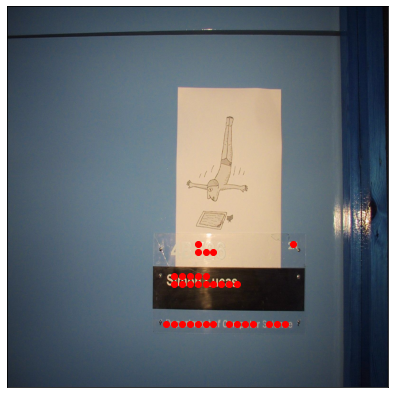

In [31]:
plt.figure(figsize=(15, 15))
plt.subplot(122),plt.imshow(cropped_image)
plt.xticks([]), plt.yticks([])
newline = 0
for y in range(0,240,5):
    newline = 1
    for x in range(0,240,5):
        if whyme[y][x][1] >=1:
            plt.plot(int(x*960/240),int(y*960/240),'ro')
            print(str(whyme[y][x]) + " --- " + str(x) + "/" + str(y))
            if newline: 
                print("---------------------------")
                newline = 0

plt.show()


